In [75]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [76]:
#load flat file dataset & select columns needed for analysis
telecom_data = pd.read_csv('/Volumes/Editing/Bellevue Univ/Masters in Data Science/DSC 680 Applied Data Science/Project 1/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [77]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [78]:
# Count of rows/columns
print(telecom_data.shape)

(7043, 21)


In [51]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
telecom_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [53]:
telecom_data['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [54]:
telecom_data['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [55]:
telecom_data.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [56]:
# Count of missing values 
telecom_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null vaules found


In [57]:
# Covert churn to numeric datatypes 
telecom_data['Churn'] = telecom_data['Churn'].replace({"Yes": 1,"No":0})

/var/folders/rm/9b6561r12137sm0p138y31940000gn/T/ipykernel_21000/3877848291.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_data['Churn'] = telecom_data['Churn'].replace({"Yes": 1,"No":0})


In [ ]:
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors='coerce')

In [58]:
# How many customers have churned? 
target= telecom_data['Attrition ']

KeyError: 'Attrition '

In [ ]:
# Drop the customer ID column
telecom_data.drop('customerID', axis=1, inplace=True)

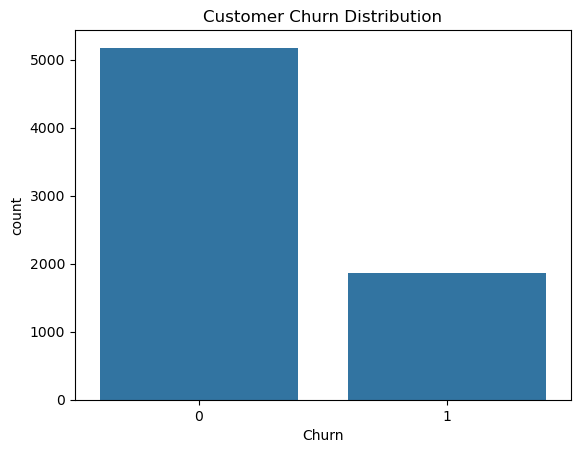

In [ ]:
# Visualize churn
sns.countplot(data=telecom_data, x='Churn')
plt.title("Customer Churn Distribution")
plt.show()


The dataset shows class imbalance, with more customers staying than leaving. This is important for modeling decisions later.

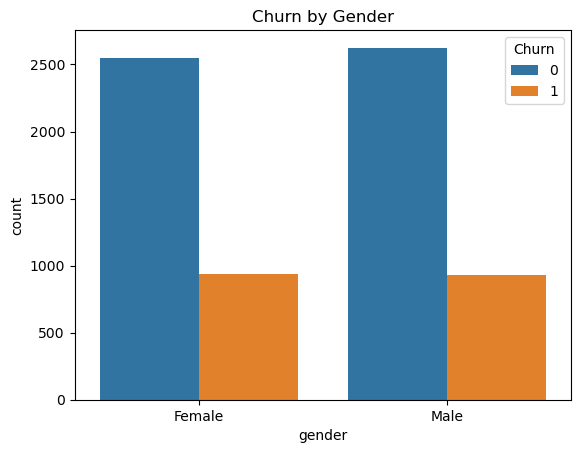

In [64]:
# Churn by Gender 
sns.countplot(data=telecom_data, x='gender', hue='Churn')
plt.title("Churn by Gender")
plt.show()

Churn rates appear similar across genders, suggesting gender alone is not a strong predictor.

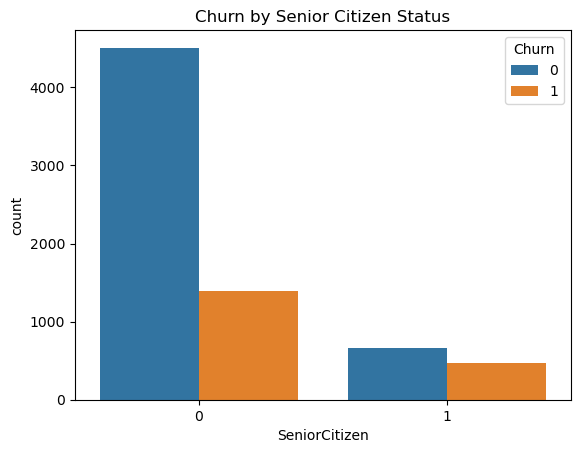

In [65]:
# Churn by Senior Citizen Status
sns.countplot(data=telecom_data, x='SeniorCitizen', hue='Churn')
plt.title("Churn by Senior Citizen Status")
plt.show()

Senior citizens show a noticeably higher churn rate compared to non-senior customers.

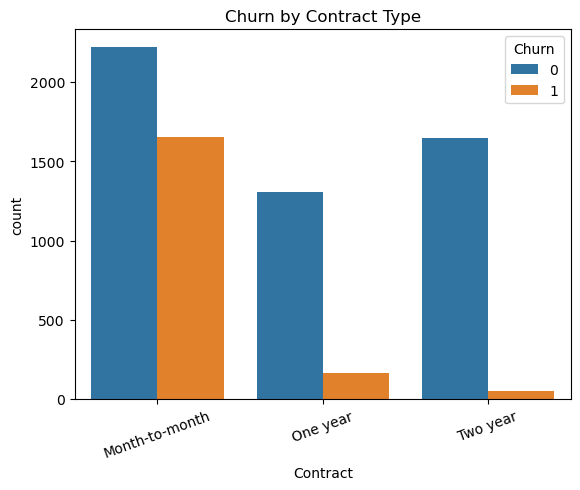

In [66]:
# Churn by contract type 
sns.countplot(data=telecom_data, x='Contract', hue='Churn')
plt.xticks(rotation=20)
plt.title("Churn by Contract Type")
plt.show()

Month-to-month contracts have significantly higher churn compared to one-year and two-year contracts.

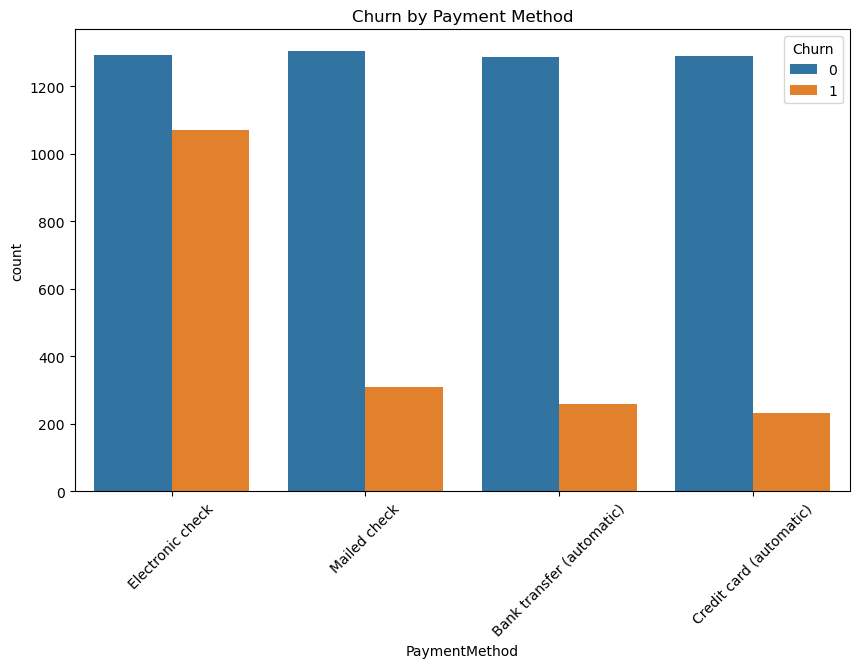

In [69]:
# Churn by Payment Method
plt.figure(figsize=(10,6))
sns.countplot(data=telecom_data, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()


Customers using electronic checks churn more frequently than those using automatic payments.

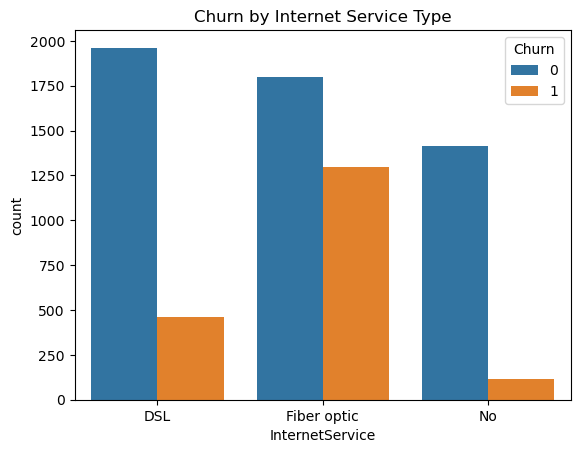

In [70]:
sns.countplot(data=telecom_data, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service Type")
plt.show()

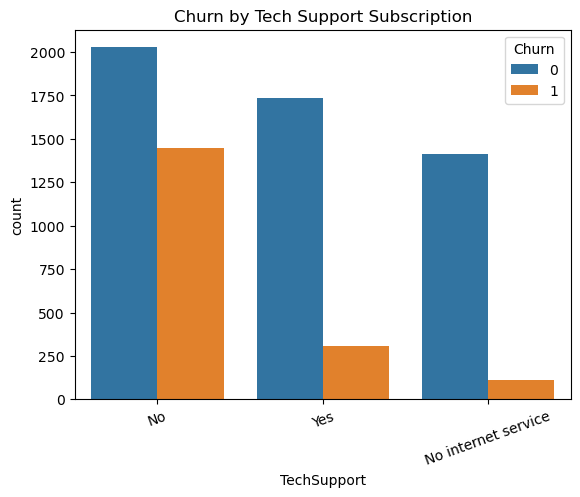

In [71]:
sns.countplot(data=telecom_data, x='TechSupport', hue='Churn')
plt.xticks(rotation=20)
plt.title("Churn by Tech Support Subscription")
plt.show()

Customers without tech support churn at a much higher rate, suggesting support services improve retention.

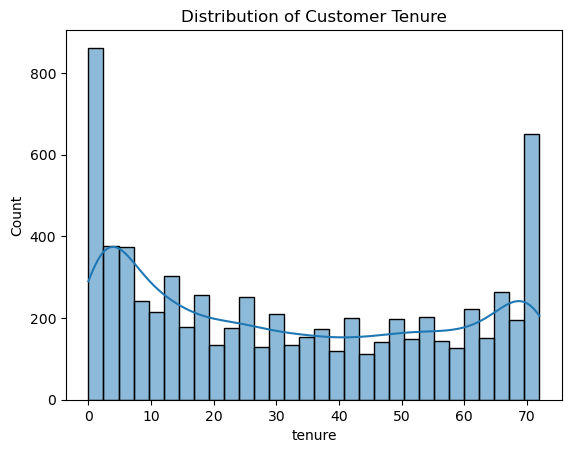

In [72]:
sns.histplot(telecom_data['tenure'], bins=30, kde=True)
plt.title("Distribution of Customer Tenure")
plt.show()

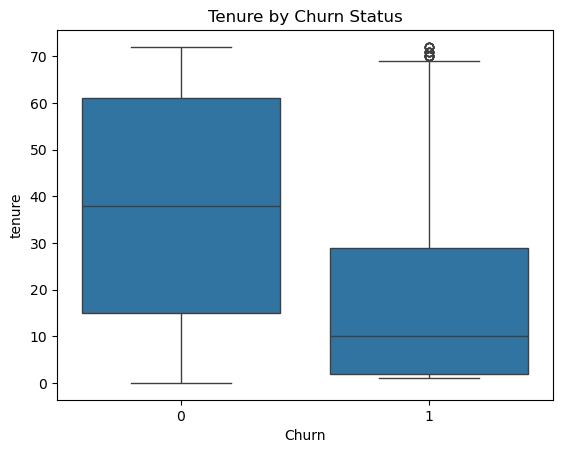

In [73]:
sns.boxplot(data=telecom_data, x='Churn', y='tenure')
plt.title("Tenure by Churn Status")
plt.show()

Customers who churn tend to have much shorter tenure.

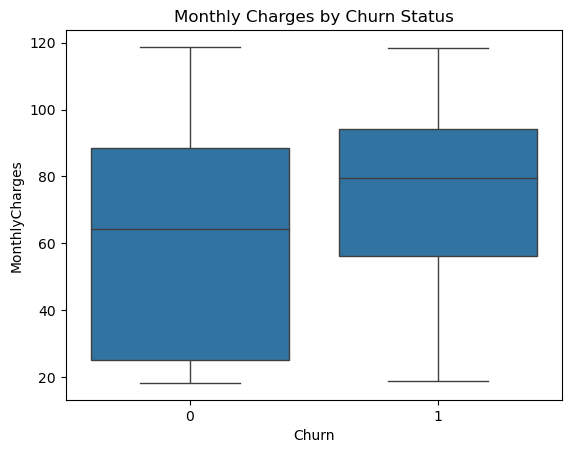

In [74]:
# Monthly Charges vs Churn
sns.boxplot(data=telecom_data, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn Status")
plt.show()

Customers with higher monthly charges are more likely to churn.